In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
import seaborn as sns

In [5]:
df=pd.read_excel("CHURNDATA.xlsx")

In [6]:
df.head()

,CIF,CUS_DOB,AGE,CUS_Month_Income,CUS_Gender,CUS_Marital_Status,CUS_Customer_Since,YEARS_WITH_US,# total debit transactions for S1,# total debit transactions for S2,...,total credit amount for S2,total credit amount for S3,total debit amount,total debit transactions,total credit amount,total credit transactions,total transactions,CUS_Target,TAR_Desc,Status
0,XXXXXX,Feb 13 1970 12:00AM,49,7116.64,MALE,MARRIED,1994-06-30,25,277,265,...,1764079.61,2378592.62,4758311.63,887,5659653.33,65,952,2231,EXECUTIVE,ACTIVE
1,XXXXXX,Sep 20 1973 12:00AM,46,1500000.00,FEMALE,SINGLE,2005-05-19,14,37,15,...,19500.00,57500.00,139363.22,97,87000.00,10,107,2223,LOW,ACTIVE
2,XXXXXX,Jul 18 1966 12:00AM,53,5000000.00,FEMALE,SINGLE,2005-05-20,14,31,14,...,240311.84,70946.86,37375.46,53,1020883.70,27,80,2222,MIDLE,ACTIVE
3,XXXXXX,Jan 9 2004 12:00AM,15,500.00,FEMALE,SINGLE,2005-05-20,14,0,1,...,28089.99,18753.92,4000.00,1,76946.96,12,13,2223,LOW,ACTIVE
4,XXXXXX,Mar 7 1971 12:00AM,48,9000000.00,FEMALE,SINGLE,2014-06-30,5,15,33,...,176000.00,70500.00,338470.29,60,442100.00,21,81,2223,LOW,ACTIVE


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1249 entries, 0 to 1248
Data columns (total 28 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   CIF                                 1249 non-null   object        
 1   CUS_DOB                             1249 non-null   object        
 2   AGE                                 1249 non-null   int64         
 3   CUS_Month_Income                    1238 non-null   float64       
 4   CUS_Gender                          1247 non-null   object        
 5   CUS_Marital_Status                  1249 non-null   object        
 6   CUS_Customer_Since                  1249 non-null   datetime64[ns]
 7   YEARS_WITH_US                       1249 non-null   int64         
 8   # total debit transactions for S1   1249 non-null   int64         
 9   # total debit transactions for S2   1249 non-null   int64         
 10  # total debit transactio

In [5]:
df.describe()

,AGE,CUS_Month_Income,YEARS_WITH_US,# total debit transactions for S1,# total debit transactions for S2,# total debit transactions for S3,total debit amount for S1,total debit amount for S2,total debit amount for S3,# total credit transactions for S1,...,# total credit transactions for S3,total credit amount for S1,total credit amount for S2,total credit amount for S3,total debit amount,total debit transactions,total credit amount,total credit transactions,total transactions,CUS_Target
count,1249.000000,1.238000e+03,1249.000000,1249.000000,1249.000000,1249.000000,1.249000e+03,1.249000e+03,1.249000e+03,1249.000000,...,1249.000000,1.249000e+03,1.249000e+03,1.249000e+03,1.249000e+03,1249.000000,1.249000e+03,1249.000000,1249.000000,1249.000000
mean,46.746998,2.764869e+06,14.116894,54.262610,55.680544,56.966373,3.147439e+05,3.090418e+05,3.061457e+05,7.613291,...,8.675741,3.089540e+05,3.173819e+05,3.020052e+05,9.299314e+05,166.909528,9.283411e+05,24.559648,191.469175,2222.296237
std,12.315109,5.406761e+06,2.279882,80.732325,81.020146,84.649516,1.513433e+06,1.293928e+06,9.385775e+05,13.543207,...,14.087572,1.631418e+06,1.048443e+06,1.273680e+06,3.142967e+06,235.386076,3.685585e+06,38.467079,263.353988,3.314255
min,14.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,1.000000,2211.000000
25%,39.000000,7.568750e+03,14.000000,7.000000,6.000000,6.000000,1.155000e+04,1.122578e+04,7.085000e+03,0.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,5.642350e+04,26.000000,1.511744e+04,2.000000,33.000000,2222.000000
50%,46.000000,1.500000e+06,14.000000,22.000000,24.000000,24.000000,5.395632e+04,6.158130e+04,5.907391e+04,6.000000,...,6.000000,4.522084e+04,4.679082e+04,4.952000e+04,2.031400e+05,74.000000,1.525319e+05,18.000000,90.000000,2223.000000
75%,55.000000,3.000000e+06,14.000000,65.000000,65.000000,68.000000,1.892775e+05,2.096500e+05,2.250619e+05,8.000000,...,10.000000,1.720000e+05,1.872971e+05,1.950319e+05,6.613808e+05,196.000000,5.853255e+05,28.000000,227.000000,2223.000000
max,119.000000,8.000000e+07,28.000000,715.000000,547.000000,757.000000,3.573349e+07,3.723382e+07,1.866511e+07,189.000000,...,169.000000,4.920688e+07,1.753799e+07,3.764708e+07,6.997262e+07,1859.000000,1.043919e+08,429.000000,2174.000000,2236.000000


In [6]:
df['Status'].value_counts()

ACTIVE    1022
CHURN      227
Name: Status, dtype: int64

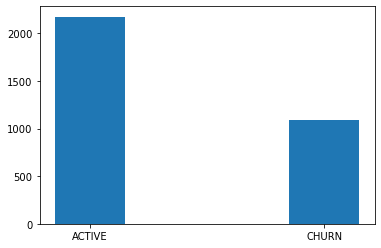

In [7]:
plt.bar('Status','total transactions',data=df,width=0.3)
plt.show()

In [8]:
df.groupby(['Status','CUS_Gender']).agg({'total credit transactions':np.mean})

total credit transactions
Status CUS_Gender                           
ACTIVE FEMALE                      26.682028
       MALE                        29.608844
CHURN  FEMALE                       7.638889
       MALE                         7.379085

In [9]:
#drop columns that aren't impactful
df=df.drop(['CIF','CUS_DOB','CUS_Customer_Since'],axis=1)

In [10]:
df.head()

,AGE,CUS_Month_Income,CUS_Gender,CUS_Marital_Status,YEARS_WITH_US,# total debit transactions for S1,# total debit transactions for S2,# total debit transactions for S3,total debit amount for S1,total debit amount for S2,...,total credit amount for S2,total credit amount for S3,total debit amount,total debit transactions,total credit amount,total credit transactions,total transactions,CUS_Target,TAR_Desc,Status
0,49,7116.64,MALE,MARRIED,25,277,265,345,1459126.64,1230543.08,...,1764079.61,2378592.62,4758311.63,887,5659653.33,65,952,2231,EXECUTIVE,ACTIVE
1,46,1500000.00,FEMALE,SINGLE,14,37,15,45,35372.55,20134.00,...,19500.00,57500.00,139363.22,97,87000.00,10,107,2223,LOW,ACTIVE
2,53,5000000.00,FEMALE,SINGLE,14,31,14,8,28248.85,4777.66,...,240311.84,70946.86,37375.46,53,1020883.70,27,80,2222,MIDLE,ACTIVE
3,15,500.00,FEMALE,SINGLE,14,0,1,0,0.00,4000.00,...,28089.99,18753.92,4000.00,1,76946.96,12,13,2223,LOW,ACTIVE
4,48,9000000.00,FEMALE,SINGLE,5,15,33,12,69083.38,223007.51,...,176000.00,70500.00,338470.29,60,442100.00,21,81,2223,LOW,ACTIVE


In [11]:
#dividing independent and dependent variables before data cleaning to avoid any data leakage
X = df.iloc[:, :-1]
y = df.iloc[:, -1]


In [12]:
X.head()

,AGE,CUS_Month_Income,CUS_Gender,CUS_Marital_Status,YEARS_WITH_US,# total debit transactions for S1,# total debit transactions for S2,# total debit transactions for S3,total debit amount for S1,total debit amount for S2,...,total credit amount for S1,total credit amount for S2,total credit amount for S3,total debit amount,total debit transactions,total credit amount,total credit transactions,total transactions,CUS_Target,TAR_Desc
0,49,7116.64,MALE,MARRIED,25,277,265,345,1459126.64,1230543.08,...,1516981.10,1764079.61,2378592.62,4758311.63,887,5659653.33,65,952,2231,EXECUTIVE
1,46,1500000.00,FEMALE,SINGLE,14,37,15,45,35372.55,20134.00,...,10000.00,19500.00,57500.00,139363.22,97,87000.00,10,107,2223,LOW
2,53,5000000.00,FEMALE,SINGLE,14,31,14,8,28248.85,4777.66,...,709625.00,240311.84,70946.86,37375.46,53,1020883.70,27,80,2222,MIDLE
3,15,500.00,FEMALE,SINGLE,14,0,1,0,0.00,4000.00,...,30103.05,28089.99,18753.92,4000.00,1,76946.96,12,13,2223,LOW
4,48,9000000.00,FEMALE,SINGLE,5,15,33,12,69083.38,223007.51,...,195600.00,176000.00,70500.00,338470.29,60,442100.00,21,81,2223,LOW


In [13]:
y.head()
Y=pd.DataFrame(y)
Y

,Status
0,ACTIVE
1,ACTIVE
2,ACTIVE
3,ACTIVE
4,ACTIVE
...,...
1244,CHURN
1245,ACTIVE
1246,ACTIVE
1247,ACTIVE


In [14]:
X.isnull().sum()

AGE                                    0
CUS_Month_Income                      11
CUS_Gender                             2
CUS_Marital_Status                     0
YEARS_WITH_US                          0
# total debit transactions for S1      0
# total debit transactions for S2      0
# total debit transactions for S3      0
total debit amount for S1              0
total debit amount for S2              0
total debit amount for S3              0
# total credit transactions for S1     0
# total credit transactions for S2     0
# total credit transactions for S3     0
total credit amount for S1             0
total credit amount for S2             0
total credit amount for S3             0
total debit amount                     0
total debit transactions               0
total credit amount                    0
total credit transactions              0
total transactions                     0
CUS_Target                             0
TAR_Desc                               0
dtype: int64

In [15]:
#data imputing to treat missing values
from sklearn.impute import SimpleImputer
missing_col = ['CUS_Month_Income']
#Technique 1: Using mean to impute the missing values
for i in missing_col:
 X.loc[X.loc[:,i].isnull(),i]=X.loc[:,i].mean()

In [16]:
from sklearn.impute import SimpleImputer
missing_col = ['CUS_Gender']
for i in missing_col:
 X.loc[X.loc[:,i].isnull(),i]="MALE"

In [17]:
X.isnull().sum()

AGE                                   0
CUS_Month_Income                      0
CUS_Gender                            0
CUS_Marital_Status                    0
YEARS_WITH_US                         0
# total debit transactions for S1     0
# total debit transactions for S2     0
# total debit transactions for S3     0
total debit amount for S1             0
total debit amount for S2             0
total debit amount for S3             0
# total credit transactions for S1    0
# total credit transactions for S2    0
# total credit transactions for S3    0
total credit amount for S1            0
total credit amount for S2            0
total credit amount for S3            0
total debit amount                    0
total debit transactions              0
total credit amount                   0
total credit transactions             0
total transactions                    0
CUS_Target                            0
TAR_Desc                              0
dtype: int64

In [18]:
#handling categorial variables
X= pd.get_dummies(X, columns = ['CUS_Gender', 'CUS_Marital_Status','TAR_Desc'])

In [19]:
X

,AGE,CUS_Month_Income,YEARS_WITH_US,# total debit transactions for S1,# total debit transactions for S2,# total debit transactions for S3,total debit amount for S1,total debit amount for S2,total debit amount for S3,# total credit transactions for S1,...,CUS_Marital_Status_DIVORCE,CUS_Marital_Status_MARRIED,CUS_Marital_Status_OTHER,CUS_Marital_Status_PARTNER,CUS_Marital_Status_SINGLE,CUS_Marital_Status_WIDOWED,TAR_Desc_EXECUTIVE,TAR_Desc_LOW,TAR_Desc_MIDLE,TAR_Desc_PLATINUM
0,49,7116.64,25,277,265,345,1459126.64,1230543.08,2068641.91,10,...,0,1,0,0,0,0,1,0,0,0
1,46,1500000.00,14,37,15,45,35372.55,20134.00,83856.67,2,...,0,0,0,0,1,0,0,1,0,0
2,53,5000000.00,14,31,14,8,28248.85,4777.66,4348.95,14,...,0,0,0,0,1,0,0,0,1,0
3,15,500.00,14,0,1,0,0.00,4000.00,0.00,5,...,0,0,0,0,1,0,0,1,0,0
4,48,9000000.00,5,15,33,12,69083.38,223007.51,46379.40,8,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1244,68,4500.00,14,13,12,1,3069.60,2376.00,200.00,0,...,0,0,0,0,1,0,0,1,0,0
1245,35,3500000.00,14,55,35,37,119297.02,118884.00,147554.88,7,...,0,0,0,0,1,0,0,0,1,0
1246,34,1000.00,14,415,368,424,1068684.72,571814.89,833122.07,63,...,0,0,0,0,1,0,0,0,1,0
1247,69,2000000.00,14,147,202,234,397602.73,514584.25,459665.24,11,...,0,0,0,0,1,0,0,0,1,0


In [20]:
#Label encoding dependent variable 
from sklearn.preprocessing import LabelEncoder
Y=Y.apply(LabelEncoder().fit_transform)

In [21]:
Y

,Status
0,0
1,0
2,0
3,0
4,0
...,...
1244,1
1245,0
1246,0
1247,0


In [22]:
#Standardising some columns
X1=X[['CUS_Month_Income','total debit amount for S1','total debit amount for S2','total debit amount for S3','total credit amount for S1','total credit amount for S2','total credit amount for S3','total debit amount','total credit amount']]

In [23]:
X1

,CUS_Month_Income,total debit amount for S1,total debit amount for S2,total debit amount for S3,total credit amount for S1,total credit amount for S2,total credit amount for S3,total debit amount,total credit amount
0,7116.64,1459126.64,1230543.08,2068641.91,1516981.10,1764079.61,2378592.62,4758311.63,5659653.33
1,1500000.00,35372.55,20134.00,83856.67,10000.00,19500.00,57500.00,139363.22,87000.00
2,5000000.00,28248.85,4777.66,4348.95,709625.00,240311.84,70946.86,37375.46,1020883.70
3,500.00,0.00,4000.00,0.00,30103.05,28089.99,18753.92,4000.00,76946.96
4,9000000.00,69083.38,223007.51,46379.40,195600.00,176000.00,70500.00,338470.29,442100.00
...,...,...,...,...,...,...,...,...,...
1244,4500.00,3069.60,2376.00,200.00,0.00,0.00,0.00,5645.60,0.00
1245,3500000.00,119297.02,118884.00,147554.88,114601.14,119137.62,440891.65,385735.90,674630.41
1246,1000.00,1068684.72,571814.89,833122.07,936134.09,733658.65,971555.27,2473621.68,2641348.01
1247,2000000.00,397602.73,514584.25,459665.24,377245.00,532708.75,400814.60,1371852.22,1310768.35


In [24]:
#Min max scaling 
df_min_max_scaled = X1.copy()
  
# apply normalization techniques
for column in df_min_max_scaled.columns:
    df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())    
  
# view normalized data
print(df_min_max_scaled)

      CUS_Month_Income  total debit amount for S1  total debit amount for S2  \
0             0.000089                   0.040834                   0.033049   
1             0.018750                   0.000990                   0.000541   
2             0.062500                   0.000791                   0.000128   
3             0.000006                   0.000000                   0.000107   
4             0.112500                   0.001933                   0.005989   
...                ...                        ...                        ...   
1244          0.000056                   0.000086                   0.000064   
1245          0.043750                   0.003339                   0.003193   
1246          0.000013                   0.029907                   0.015357   
1247          0.025000                   0.011127                   0.013820   
1248          0.062500                   0.001672                   0.011283   

      total debit amount for S3  total 

In [25]:
df_min_max_scaled

,CUS_Month_Income,total debit amount for S1,total debit amount for S2,total debit amount for S3,total credit amount for S1,total credit amount for S2,total credit amount for S3,total debit amount,total credit amount
0,0.000089,0.040834,0.033049,0.110829,0.030829,0.100586,0.063181,0.068002,0.054215
1,0.018750,0.000990,0.000541,0.004493,0.000203,0.001112,0.001527,0.001992,0.000833
2,0.062500,0.000791,0.000128,0.000233,0.014421,0.013702,0.001885,0.000534,0.009779
3,0.000006,0.000000,0.000107,0.000000,0.000612,0.001602,0.000498,0.000057,0.000737
4,0.112500,0.001933,0.005989,0.002485,0.003975,0.010035,0.001873,0.004837,0.004235
...,...,...,...,...,...,...,...,...,...
1244,0.000056,0.000086,0.000064,0.000011,0.000000,0.000000,0.000000,0.000081,0.000000
1245,0.043750,0.003339,0.003193,0.007905,0.002329,0.006793,0.011711,0.005513,0.006462
1246,0.000013,0.029907,0.015357,0.044635,0.019024,0.041833,0.025807,0.035351,0.025302
1247,0.025000,0.011127,0.013820,0.024627,0.007667,0.030375,0.010647,0.019606,0.012556


In [26]:
X=X.drop(['CUS_Month_Income','total debit amount for S1','total debit amount for S2','total debit amount for S3','total credit amount for S1','total credit amount for S2','total credit amount for S3','total debit amount','total credit amount'],axis=1)

In [27]:
X= pd.concat([X,df_min_max_scaled], axis=1, join='inner')

In [28]:
X

,AGE,YEARS_WITH_US,# total debit transactions for S1,# total debit transactions for S2,# total debit transactions for S3,# total credit transactions for S1,# total credit transactions for S2,# total credit transactions for S3,total debit transactions,total credit transactions,...,TAR_Desc_PLATINUM,CUS_Month_Income,total debit amount for S1,total debit amount for S2,total debit amount for S3,total credit amount for S1,total credit amount for S2,total credit amount for S3,total debit amount,total credit amount
0,49,25,277,265,345,10,24,31,887,65,...,0,0.000089,0.040834,0.033049,0.110829,0.030829,0.100586,0.063181,0.068002,0.054215
1,46,14,37,15,45,2,4,4,97,10,...,0,0.018750,0.000990,0.000541,0.004493,0.000203,0.001112,0.001527,0.001992,0.000833
2,53,14,31,14,8,14,8,5,53,27,...,0,0.062500,0.000791,0.000128,0.000233,0.014421,0.013702,0.001885,0.000534,0.009779
3,15,14,0,1,0,5,4,3,1,12,...,0,0.000006,0.000000,0.000107,0.000000,0.000612,0.001602,0.000498,0.000057,0.000737
4,48,5,15,33,12,8,7,6,60,21,...,0,0.112500,0.001933,0.005989,0.002485,0.003975,0.010035,0.001873,0.004837,0.004235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1244,68,14,13,12,1,0,0,0,26,0,...,0,0.000056,0.000086,0.000064,0.000011,0.000000,0.000000,0.000000,0.000081,0.000000
1245,35,14,55,35,37,7,6,9,127,22,...,0,0.043750,0.003339,0.003193,0.007905,0.002329,0.006793,0.011711,0.005513,0.006462
1246,34,14,415,368,424,63,76,78,1207,217,...,0,0.000013,0.029907,0.015357,0.044635,0.019024,0.041833,0.025807,0.035351,0.025302
1247,69,14,147,202,234,11,14,23,583,48,...,0,0.025000,0.011127,0.013820,0.024627,0.007667,0.030375,0.010647,0.019606,0.012556


In [29]:
Y.value_counts()

Status
0         1022
1          227
dtype: int64

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


In [31]:
#oversampling using SMOTE
#!pip install imblearn
#!pip install scikit-learn
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_resample(X_train, Y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['Status'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of active in oversampled data",len(os_data_y[os_data_y['Status']==0]))
print("Number of churn",len(os_data_y[os_data_y['Status']==1]))
print("Proportion of active data in oversampled data is ",len(os_data_y[os_data_y['Status']==0])/len(os_data_X))
print("Proportion of churn data in oversampled data is ",len(os_data_y[os_data_y['Status']==1])/len(os_data_X))

length of oversampled data is  1434
Number of active in oversampled data 717
Number of churn 717
Proportion of active data in oversampled data is  0.5
Proportion of churn data in oversampled data is  0.5


In [32]:
#Recursive feature elimination
data_final_vars=df.values.tolist()
y=['Status']
x=[i for i in df if i not in y]

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
rfe = RFE(logreg,step=5)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[False False  True  True  True  True  True  True False  True  True False
  True  True  True  True False False False False  True  True  True  True
 False False False False False False False False False]
[3 2 1 1 1 1 1 1 3 1 1 4 1 1 1 1 3 5 2 4 1 1 1 1 4 5 5 3 4 3 5 5 4]


C:\Users\kaush\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\kaush\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

C:\Users\kaush\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kaush\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [37]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, Y_test)))

Accuracy of logistic regression classifier on test set: 0.84


In [39]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test, y_pred)
print(confusion_matrix)

[[284  21]
 [ 38  32]]


In [40]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91       305
           1       0.60      0.46      0.52        70

    accuracy                           0.84       375
   macro avg       0.74      0.69      0.71       375
weighted avg       0.83      0.84      0.83       375



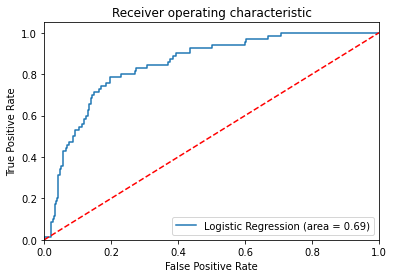

In [41]:
#ROC curve and AUC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(Y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [42]:
# p value
import statsmodels.api as sm
logit_model=sm.Logit(Y,X)
result=logit_model.fit()
print(result.summary())

         Current function value: 0.310549
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                 Status   No. Observations:                 1249
Model:                          Logit   Df Residuals:                     1223
Method:                           MLE   Df Model:                           25
Date:                Tue, 05 Jul 2022   Pseudo R-squ.:                  0.3449
Time:                        21:38:08   Log-Likelihood:                -387.88
converged:                      False   LL-Null:                       -592.06
Covariance Type:            nonrobust   LLR p-value:                 5.978e-71
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
AGE                                   -0.0035      0.007     -0.493      0.622      -0.018      

C:\Users\kaush\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
